In [1]:
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px
import pandas as pd
import numpy as np


In [2]:
poverty_stat = gpd.read_file('povertyacs2019_5yr_B17019_14000US06037534001.geojson')

In [3]:
poverty_stat.shape

(2347, 49)

In [4]:
poverty_stat.head ()

,geoid,name,B17019001,"B17019001, Error",B17019002,"B17019002, Error",B17019003,"B17019003, Error",B17019004,"B17019004, Error",...,"B17019019, Error",B17019020,"B17019020, Error",B17019021,"B17019021, Error",B17019022,"B17019022, Error",B17019023,"B17019023, Error",geometry
0,05000US06037,"Los Angeles County, CA",2210939.0,7196.0,247940.0,2916.0,107369.0,2355.0,27177.0,1122.0,...,1804.0,113952.0,2323.0,378517.0,3803.0,163444.0,2561.0,215073.0,3404.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1069.0,115.0,101.0,75.0,50.0,64.0,11.0,17.0,...,19.0,38.0,40.0,287.0,101.0,126.0,64.0,161.0,89.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",940.0,103.0,17.0,20.0,10.0,15.0,10.0,15.0,...,40.0,22.0,23.0,130.0,74.0,96.0,58.0,34.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",1566.0,135.0,358.0,128.0,110.0,85.0,19.0,32.0,...,16.0,68.0,53.0,102.0,66.0,14.0,22.0,88.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",924.0,102.0,107.0,71.0,1.0,10.0,1.0,10.0,...,13.0,36.0,34.0,150.0,73.0,106.0,63.0,44.0,35.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [5]:
poverty_stat = poverty_stat.drop ([0])

In [6]:
columns_to_keep = ['geoid', 
                   'name',
                   'B17019001',
                   'B17019002',
                   'B17019003',
                   'B17019004',
                   'B17019005',
                   'B17019006',
                   'B17019007',
                   'B17019008',
                   'B17019009',
                   'B17019010',
                   'B17019011',
                   'B17019012',
                   'B17019013',
                   'B17019014',
                   'B17019015',
                   'B17019016',
                   'B17019017',
                   'B17019018',
                   'B17019019',
                   'B17019020',
                   'B17019021',
                   'B17019022',
                   'B17019023',
                   'geometry']

In [7]:
poverty_stat = poverty_stat[columns_to_keep]

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
poverty_stat.columns = ['geoid', 
                   'name',
                   'total',
                   'Income in the past 12 months below poverty level: BPL',
                   'Married-couple family: BPL',
                   'Owner occupied: BPL',
                   'Renter occupied: BPL',
                   'Other families: BPL',
                   'Male householder, no spouse present: MBPL',
                   'Owner occupied: MBPL',
                   'Renter occupied: MBPL',
                   'Female householder, no spouse present: FBPL',
                   'Owner occupied: FBPL',
                   'Renter occupied: FBPL',
                   'Income in the past 12 months at or above poverty level: APL',
                   'Married-couple family: APL',
                   'Owner occupied: APL',
                   'Renter occupied: APL',
                   'Other families: APL',
                   'Male householder, no spouse present: MAPL',
                   'Owner occupied: MAPL',
                   'Renter occupied: MAPL',
                   'Female householder, no spouse present: FAPL',
                   'Owner occupied: FAPL',
                   'Renter occupied: FAPL',
                   'geometry']

In [11]:
Columns_to_keep = ['geoid','name', 'Income in the past 12 months below poverty level: BPL', 'Owner occupied: BPL', 'Renter occupied: BPL', 'Other families: BPL','geometry']

                               
                               
                               

In [12]:
poverty_trimmed = poverty_stat[Columns_to_keep].copy()


In [13]:
poverty_trimmed.head ()

,geoid,name,Income in the past 12 months below poverty level: BPL,Owner occupied: BPL,Renter occupied: BPL,Other families: BPL,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",101.0,11.0,39.0,51.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",17.0,10.0,0.0,7.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",358.0,19.0,91.0,248.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",107.0,1.0,0.0,106.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",44.0,9.0,0.0,35.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [14]:
poverty_trimmed['Percent Owner occupied: BPL'] = poverty_trimmed['Owner occupied: BPL']/poverty_trimmed['Income in the past 12 months below poverty level: BPL']*100
poverty_trimmed['Percent Renter occupied: BPL'] = poverty_trimmed['Renter occupied: BPL']/poverty_trimmed['Income in the past 12 months below poverty level: BPL']*100
poverty_trimmed['Percent Other families: BPL'] = poverty_trimmed['Other families: BPL']/poverty_trimmed['Income in the past 12 months below poverty level: BPL']*100



In [15]:
poverty_trimmed.head ()

,geoid,name,Income in the past 12 months below poverty level: BPL,Owner occupied: BPL,Renter occupied: BPL,Other families: BPL,geometry,Percent Owner occupied: BPL,Percent Renter occupied: BPL,Percent Other families: BPL
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",101.0,11.0,39.0,51.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",10.891089,38.613861,50.495050
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",17.0,10.0,0.0,7.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",58.823529,0.000000,41.176471
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",358.0,19.0,91.0,248.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",5.307263,25.418994,69.273743
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",107.0,1.0,0.0,106.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.934579,0.000000,99.065421
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",44.0,9.0,0.0,35.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",20.454545,0.000000,79.545455


In [22]:
poverty_trimmed=pd.melt(poverty_trimmed,id_vars=['name'],var_name='Percent Owner occupied: BPL', value_name='Income in the past 12 months below poverty level: BPL')




In [ ]:
poverty_trimmed.plotbar ()

In [25]:
poverty_stat_web_mercator = poverty_stat.to_crs(epsg=3857)

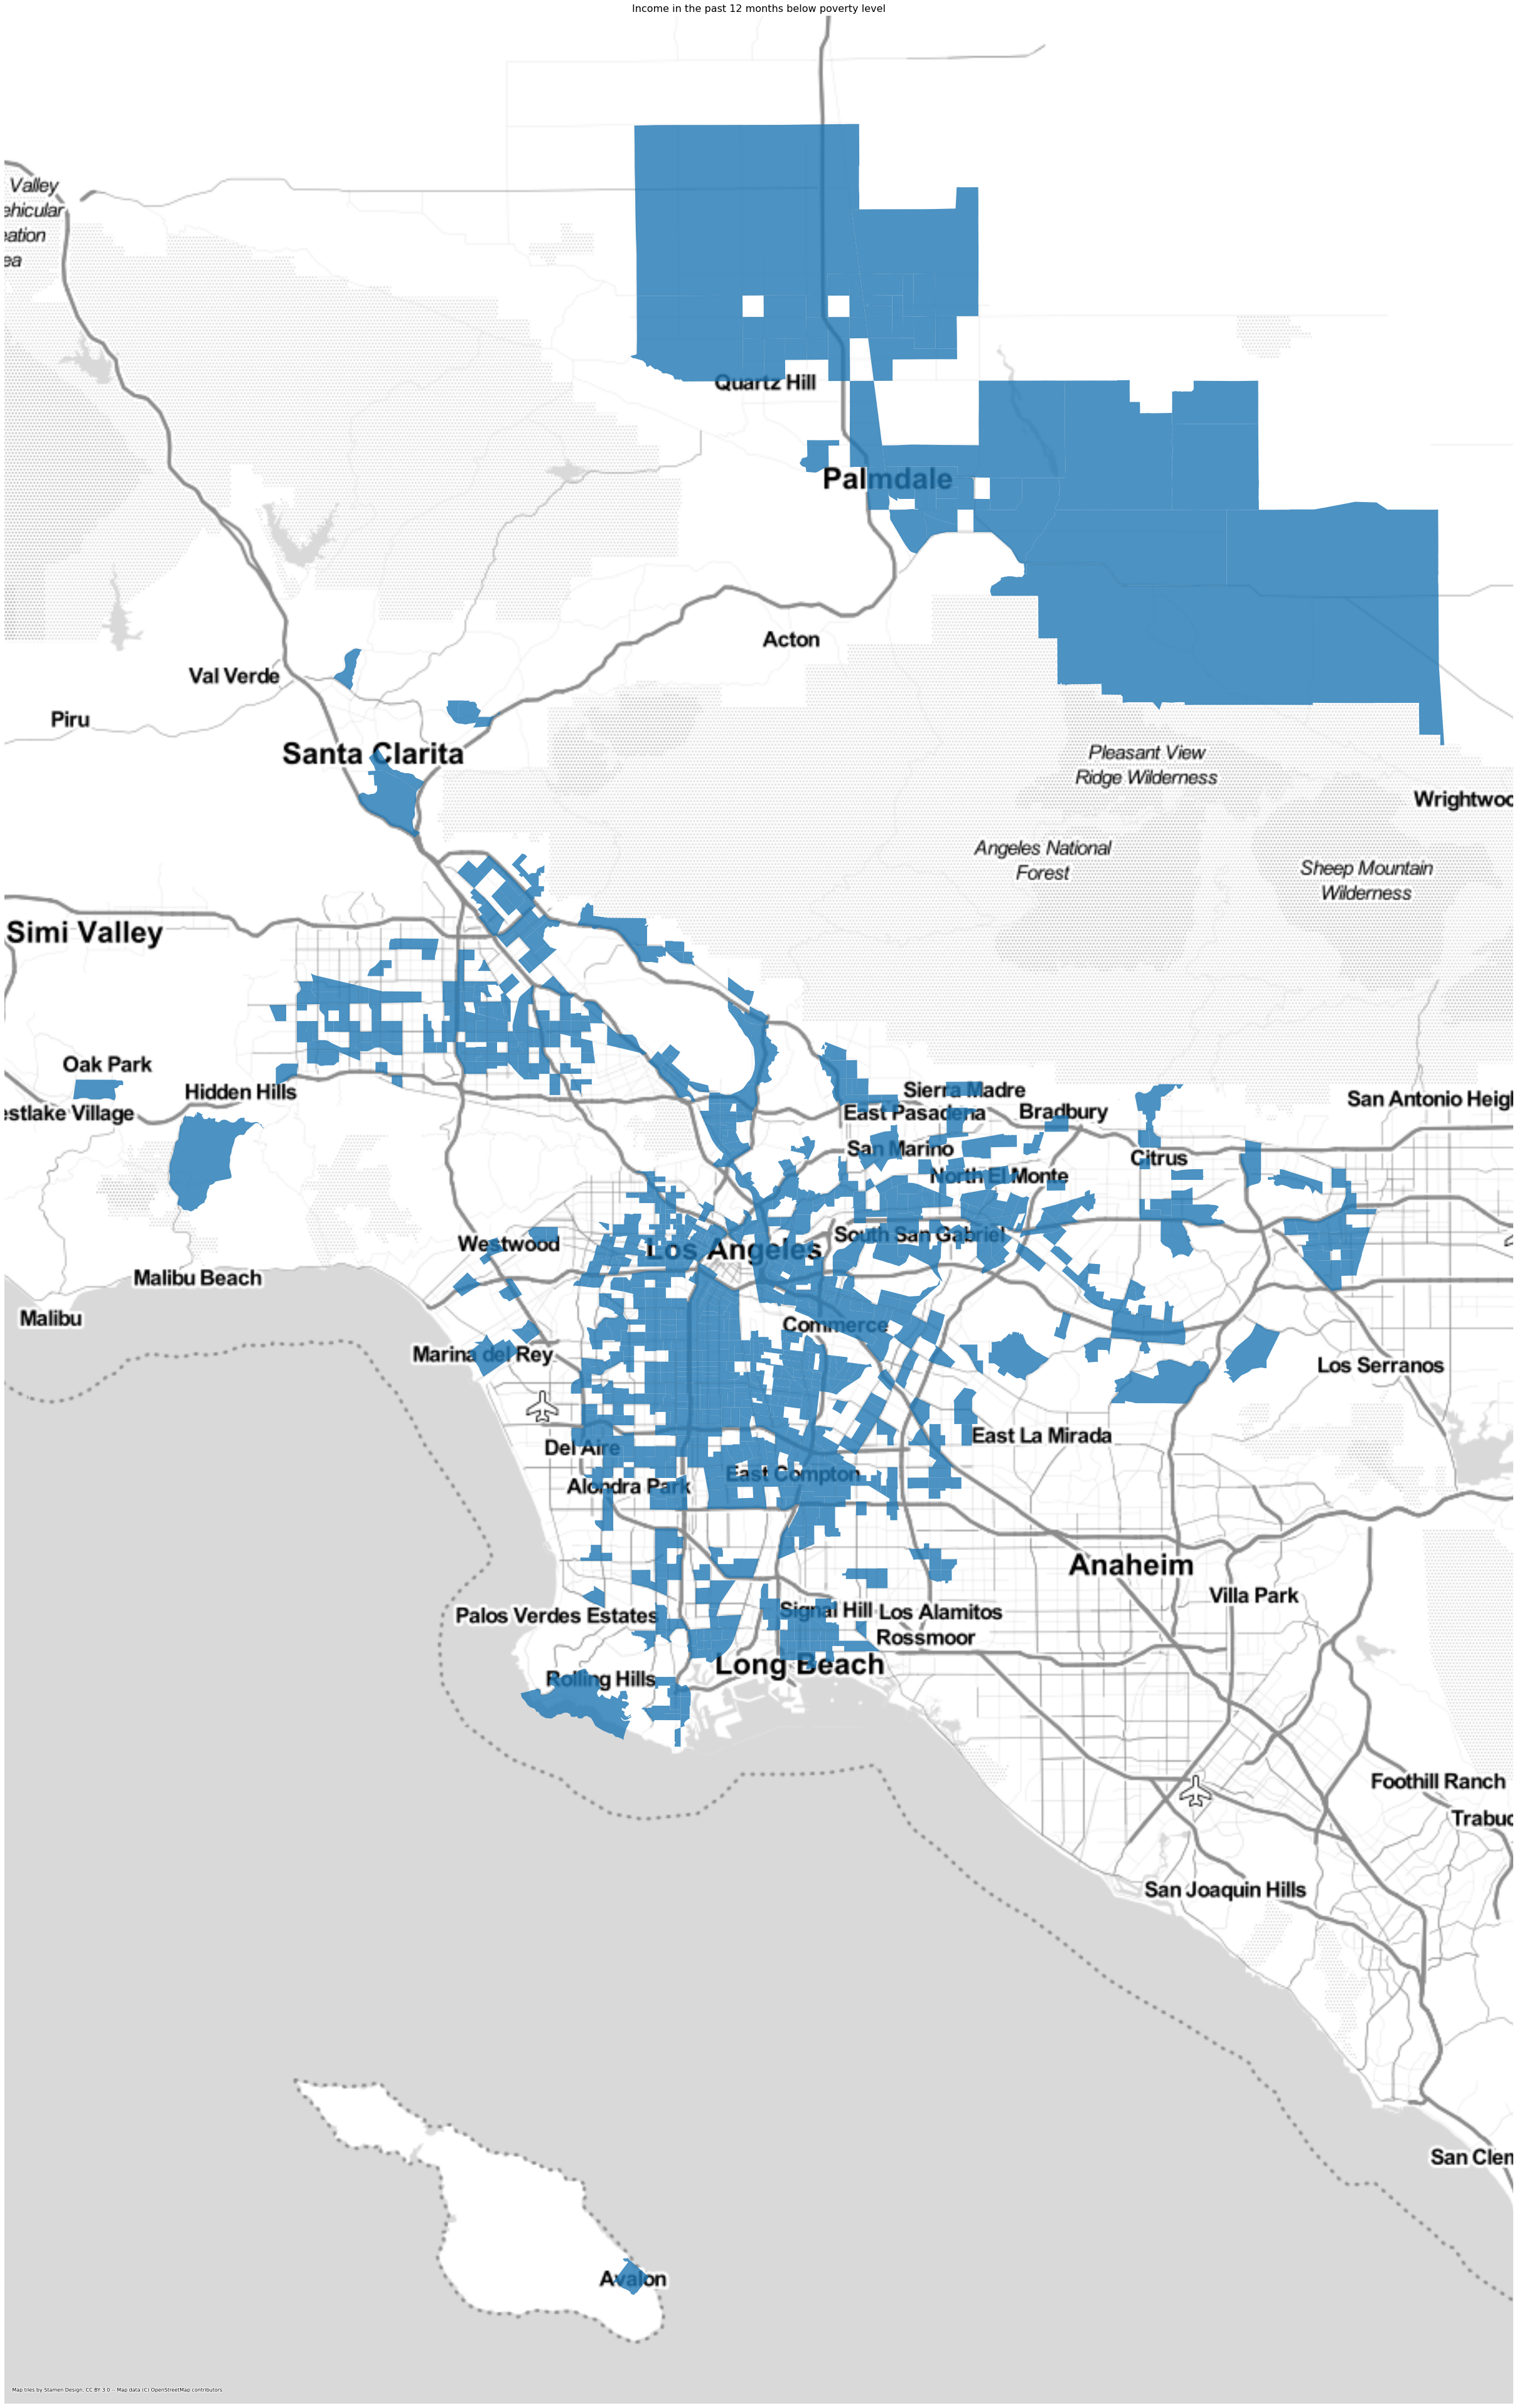

In [35]:
fig, ax = plt.subplots(figsize=(70, 70))

poverty_stat_web_mercator[poverty_stat_web_mercator['Income in the past 12 months below poverty level: BPL']> 100].plot(ax=ax, alpha=0.8)

ax.axis('off')

ax.set_title('Income in the past 12 months below poverty level',fontsize=16)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

In [27]:
px.bar(poverty_stat,
       x='Income in the past 12 months below poverty level: BPL',
       title='Income in the past 12 months below poverty level: BPL'
      )

In [30]:
px.bar(poverty_stat,
       x='Renter occupied: BPL',
       y='total',
      height= 300)
